# Feature Engineering

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
# Loading the dataset
df = pd.read_csv("datasets/cleaned_data.csv", index_col=0)

In [3]:
print(df.shape, "\n")
df.head()

(26953, 80) 



,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,0.688984,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.0,Defacement


In [4]:
df["URL_Type_obf_Type"].value_counts().index.tolist()

['benign', 'phishing', 'spam', 'Defacement', 'malware']

## Encoding the dependent variable

In [5]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [7]:
# Encoding the "URL_Type_obf_Type" column
encoder = LabelEncoder()
df["URL_Type_obf_Type"] = encoder.fit_transform(df["URL_Type_obf_Type"])

In [8]:
class_mapping = {}
for i, cls in enumerate(encoder.classes_):
    class_mapping[cls] = i

class_mapping

{'Defacement': 0, 'benign': 1, 'malware': 2, 'phishing': 3, 'spam': 4}

In [ ]:
# Save the encoder
with open("encoders/label_encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

## Splitting the dataset into training and test sets

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Separating the data into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [13]:
print("Train data shape:\nFeatures:{}\nLabel:{}".format(X_train.shape, y_train.shape))
print("\nTest data shape:\nFeatures:{}\nLabel:{}".format(X_test.shape, y_test.shape))

Train data shape:
Features:(21562, 79)
Label:(21562,)

Test data shape:
Features:(5391, 79)
Label:(5391,)


## Model Training: Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
model = RandomForestClassifier(n_estimators=25, random_state=42)

In [24]:
# Training the model on the training set
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

## Evaluating the model perfomance

In [25]:
# Evaluating the performance of the model
preds = model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, preds)
print("Model Test Set Accuracy: {:.4f}".format(accuracy))

Model Test Set Accuracy: 0.9618


In [29]:
print("Model Training set Accuracy: {:.4f}".format( accuracy_score(y_train, model.predict(X_train))))

Model Training set Accuracy: 0.9997


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
print("Classification Report:\n\n", classification_report(y_test, preds))

Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1006
           1       0.97      0.99      0.98      1514
           2       0.98      0.83      0.90       340
           3       0.93      0.96      0.94      1488
           4       0.98      0.97      0.97      1043

    accuracy                           0.96      5391
   macro avg       0.97      0.94      0.95      5391
weighted avg       0.96      0.96      0.96      5391



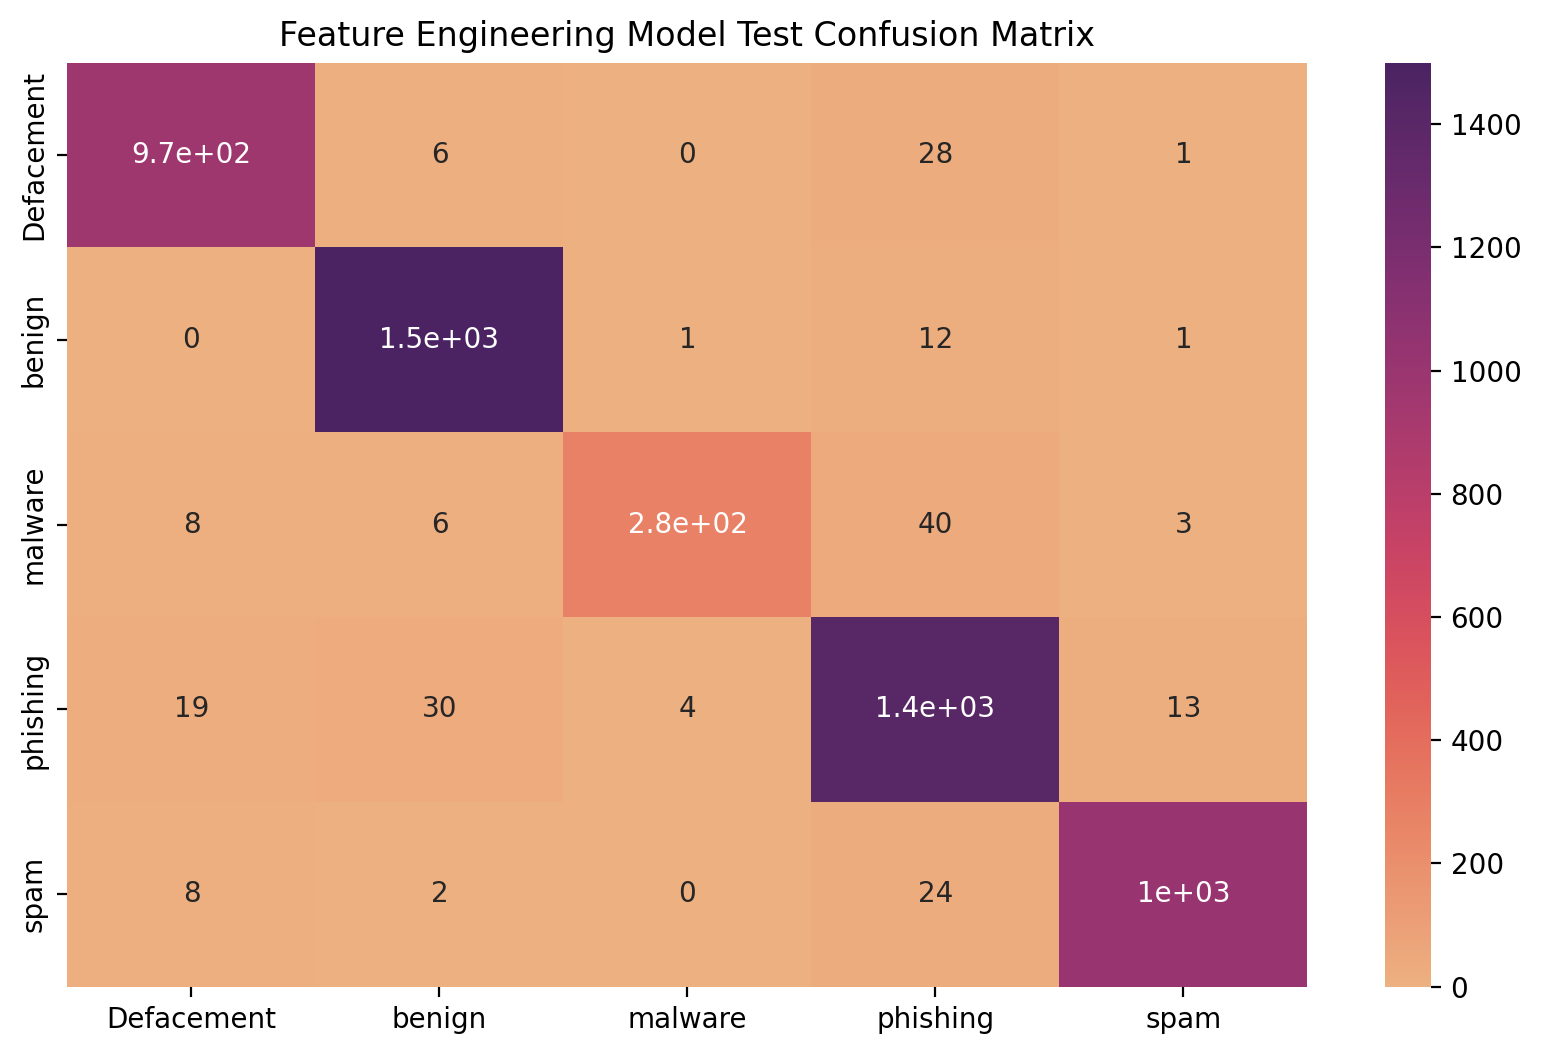

In [33]:
# Getting the confusion matrix for the model's performance
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(
    confusion_matrix(y_test, preds),
    annot=True,
    xticklabels=class_mapping.keys(),
    yticklabels=class_mapping.keys(),
    cmap="flare"
)
plt.title("Feature Engineering Model Test Confusion Matrix")
plt.savefig("./plots/feature_engineering_confusion_matrix")
plt.show()

### Selecting the best features

In [34]:
# Getting the relevant features from the model
feature_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
top_20_features = feature_importances.sort_values(ascending=False).head(20)

top_20_features

SymbolCount_Domain             0.042414
NumberofDotsinURL              0.035039
tld                            0.030816
domainlength                   0.026833
host_letter_count              0.025937
domain_token_count             0.024139
domainUrlRatio                 0.024092
ArgUrlRatio                    0.023639
NumberRate_URL                 0.023263
Entropy_Domain                 0.022184
Arguments_LongestWordLength    0.021793
CharacterContinuityRate        0.021752
SymbolCount_FileName           0.021053
avgdomaintokenlen              0.020967
avgpathtokenlen                0.020639
Query_DigitCount               0.020289
NumberRate_FileName            0.020027
urlLen                         0.019303
SymbolCount_Extension          0.019180
NumberRate_Extension           0.018755
dtype: float64

#### -> Selecting the features that have an importance of up to 1% and above

In [35]:
threshold = 0.01
selected_features = feature_importances[feature_importances > threshold]

In [36]:
print("Total number of selected features: {}".format(len(selected_features)))

Total number of selected features: 45


In [37]:
# Saving the seleced features data to a json file
selected_features.to_json("selected_features.json")

In [40]:
features_list = [*selected_features.index, "URL_Type_obf_Type"]
print(features_list)

['domain_token_count', 'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld', 'ldl_url', 'ldl_path', 'urlLen', 'domainlength', 'pathLength', 'subDirLen', 'pathurlRatio', 'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio', 'argPathRatio', 'NumberofDotsinURL', 'CharacterContinuityRate', 'Extension_DigitCount', 'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount', 'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength', 'Arguments_LongestWordLength', 'URLQueries_variable', 'spcharUrl', 'delimeter_path', 'delimeter_Count', 'NumberRate_URL', 'NumberRate_FileName', 'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_URL', 'SymbolCount_Domain', 'SymbolCount_Directoryname', 'SymbolCount_FileName', 'SymbolCount_Extension', 'Entropy_Domain', 'Entropy_Filename', 'URL_Type_obf_Type']


In [41]:
# Creating a dataset with the selected features
selected_features_df = df[features_list]

In [42]:
selected_features_df

,domain_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,ldl_url,ldl_path,urlLen,domainlength,pathLength,subDirLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,NumberofDotsinURL,CharacterContinuityRate,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Arguments_LongestWordLength,URLQueries_variable,spcharUrl,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,Entropy_Domain,Entropy_Filename,URL_Type_obf_Type
0,4,5.500000,14,4.400000,4,0,0,58,25,26,26,0.448276,0.034483,0.080000,0.431034,1.040000,0.076923,5,0.600000,1,-1,47,22,8,13,0,-1,13,14,-1,0,3,2,-1,0.017241,0.066667,1.000000,-1.000000,8,3,2,1,0,0.784493,0.850608,0
1,4,5.500000,14,6.000000,4,0,0,66,25,34,34,0.515151,0.030303,0.080000,0.378788,1.360000,0.058824,4,0.600000,0,-1,56,22,8,13,9,-1,13,14,-1,0,4,1,-1,0.000000,0.000000,0.000000,-1.000000,8,3,3,0,0,0.784493,0.859793,0
2,4,5.500000,14,5.800000,4,0,0,65,25,33,33,0.507692,0.030769,0.080000,0.384615,1.320000,0.060606,4,0.600000,0,-1,55,22,8,13,8,-1,13,14,-1,0,4,1,-1,0.000000,0.000000,0.000000,-1.000000,8,3,3,0,0,0.784493,0.801880,0
3,4,5.500000,14,5.500000,4,0,0,109,25,77,77,0.706422,0.018349,0.080000,0.229358,3.080000,0.025974,4,0.600000,0,-1,92,22,8,13,45,-1,52,14,-1,0,4,8,-1,0.000000,0.000000,0.000000,-1.000000,8,3,3,0,0,0.784493,0.663210,0
4,4,5.500000,14,7.333334,4,0,0,81,25,49,49,0.604938,0.024691,0.080000,0.308642,1.960000,0.040816,4,0.600000,0,-1,70,22,8,13,23,-1,24,14,-1,0,4,2,-1,0.000000,0.000000,0.000000,-1.000000,8,3,3,0,0,0.784493,0.804526,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36699,3,2.666667,4,4.800000,3,1,1,57,10,40,40,0.701754,0.192982,1.100000,0.175439,4.000000,0.275000,3,0.500000,4,4,42,8,15,6,9,2,15,4,0,1,4,1,1,0.070175,0.181818,0.266667,0.363636,9,2,2,3,2,0.879588,0.918457,4
36701,3,4.666666,10,3.000000,3,1,1,42,16,19,19,0.452381,0.047619,0.125000,0.380952,1.187500,0.105263,3,0.687500,0,-1,27,14,4,2,3,-1,8,10,-1,0,3,2,-1,0.142857,0.500000,0.000000,-1.000000,6,2,1,1,0,0.843750,0.814038,4
36702,4,5.750000,12,3.666667,4,3,3,146,26,113,113,0.773973,0.582192,3.269231,0.178082,4.346154,0.752212,5,0.500000,27,3,94,23,46,7,14,24,43,12,23,3,6,2,5,0.212329,0.529412,0.627907,0.066667,19,3,11,3,2,0.791265,0.690227,4
36704,3,6.666666,16,3.375000,3,20,20,246,22,217,217,0.882114,0.739837,8.272727,0.089431,9.863636,0.838710,7,0.772727,51,1,156,20,71,3,58,48,118,16,0,1,12,9,1,0.231707,0.377778,0.418033,0.029412,26,2,14,8,7,0.801139,0.713622,4


## Saving the feature selected dataset and feature engineering model

In [44]:
import pickle

In [45]:
# Saving the model
with open("models/feature_engineering_rf.pkl", "wb") as file:
    pickle.dump(model, file)

In [46]:
# Saving the dataset with the selected features
selected_features_df.to_csv("datasets/feature_selected_data.csv")